In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from datetime import date

In [7]:
data = np.array(pd.read_csv('../data/full_data.csv'))
data = data[x_raw[9] == 'DEHB005']

IndexError: boolean index did not match indexed array along dimension 0; dimension is 622083 but corresponding boolean dimension is 8

In [4]:
time, x_raw, y_raw = data[:, 0], np.delete(data, [0, 5], axis=1), data[:, [5]]
# Time => Date,
# X => PM10,NO2,NOx,NO,SO2,CO,PM2.5
# Y => O3

In [5]:
x_raw[0]

array([103.0, 18.0, 19.0, 1.0, 7.0, 0.4, nan, 'DEHB005'], dtype=object)

In [6]:
scaler_x = MinMaxScaler()
x = scaler_x.fit_transform(x_raw)
scaler_y = MinMaxScaler()
y = scaler_y.fit_transform(y_raw)[:, 0]

ValueError: could not convert string to float: 'DEHB005'

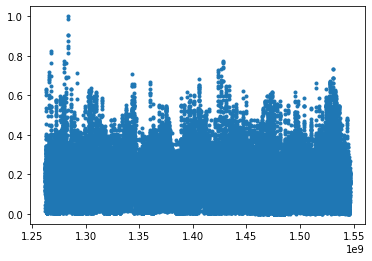

In [38]:
plt.plot(time, y, '.')
plt.show()

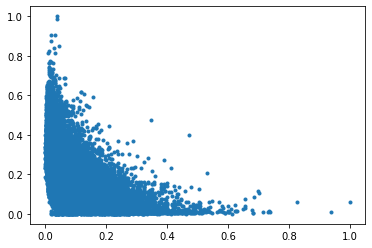

In [46]:
plt.plot(x[:, 2], y, '.')

In [62]:
start_2001 = int(date(2010, 1, 1).strftime('%s'))
end_2001 = int(date(2010, 12, 31).strftime('%s'))
mask_2001 = np.logical_and(time > start_2001, time < end_2001)
time_2001, x_2001, y_2001 = time[mask_2001], x[mask_2001], y[mask_2001]

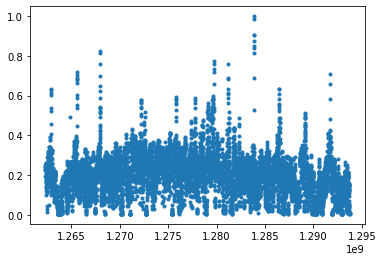

In [65]:
plt.plot(time_2001, y_2001, '.')

In [67]:
time_2001.shape

(8734,)

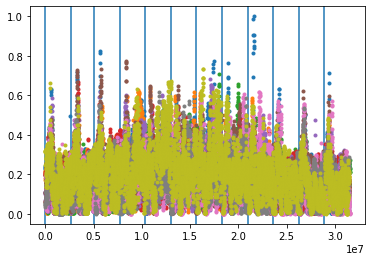

In [83]:
for i in range(1, 13):
    month_start = int(date(2010, i, 1).strftime('%s')) - int(date(2010, 1, 1).strftime('%s'))
    plt.axvline(month_start)
for year in range(2010, 2020):
    start_year = int(date(year, 1, 1).strftime('%s'))
    end_year = int(date(year, 12, 31).strftime('%s'))
    mask_year = np.logical_and(time > start_year, time < end_year)
    time_year, x_year, y_year = time[mask_year], x[mask_year], y[mask_year]
    plt.plot(time_year - start_year, y_year, '.')
#     plt.show()
plt.show()

In [ ]:
for day in range(2010, 2020):
    start_year = int(date(year, 1, 1).strftime('%s'))
    end_year = int(date(year, 12, 31).strftime('%s'))
    mask_year = np.logical_and(time > start_year, time < end_year)
    time_year, x_year, y_year = time[mask_year], x[mask_year], y[mask_year]
    plt.plot(y_year, '.')
    plt.show()